In [ ]:

import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans


We import the necessary libraries

In [ ]:
data=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We import the data. 

In [ ]:
data.isnull().values.any()

False

We check here if the data has any null values

In [ ]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


The column of ID is of no use so we deop that from our dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


We check the number of values, their mean etc in this

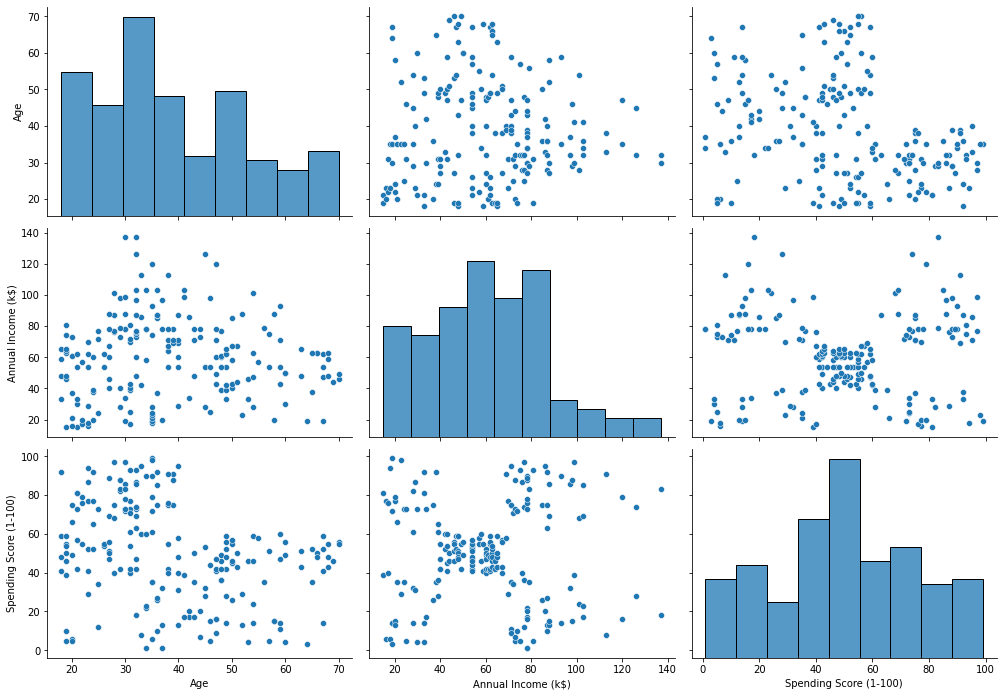

In [ ]:
sns.pairplot(data[['Age','Annual Income (k$)','Spending Score (1-100)']])
fig=plt.gcf()
fig.set_size_inches(15,10)

We use a scatterplot to identify the scattering of data between Spending Score vs Age/Income
Here we see Spending Score vs Income forms a definitve scattering plot. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(close=None, block=None)>

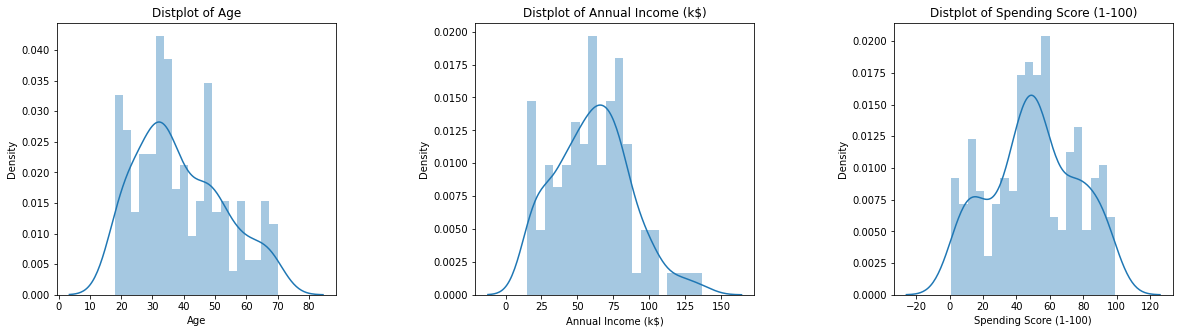

In [ ]:
plt.figure(1,figsize=(20,5))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n=n+1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show

We use a distplot to see identify the highest number of customer groups based on their age,income and identify the average spending score.
Based on age, we can vaguely say the customers of age group around 30 are our targets.
Based on Income, we can say customers of income 60-75 (k$) are our target group.

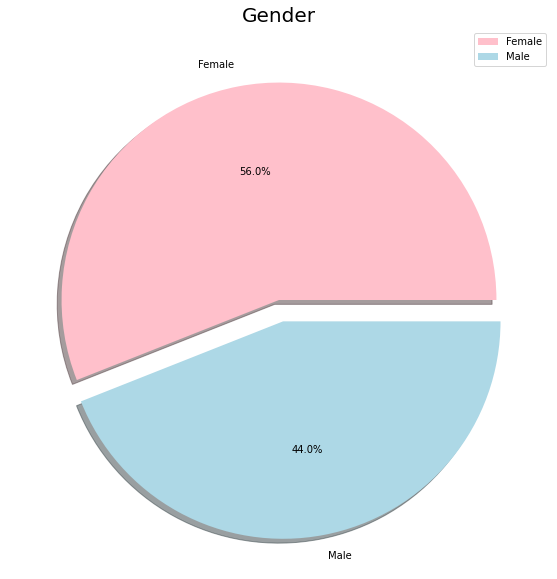

In [ ]:
gen=['Female','Male']
size=data['Gender'].value_counts()
colors=['pink','lightblue']
explode=[0,0.1]
plt.rcParams['figure.figsize']=[10,10]
plt.pie(size,colors=colors,explode=explode,labels=gen,shadow=True,autopct='%.1f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

We check the gender ratio using this pie chart and find out that there are more female customers than men.

<function matplotlib.pyplot.show(close=None, block=None)>

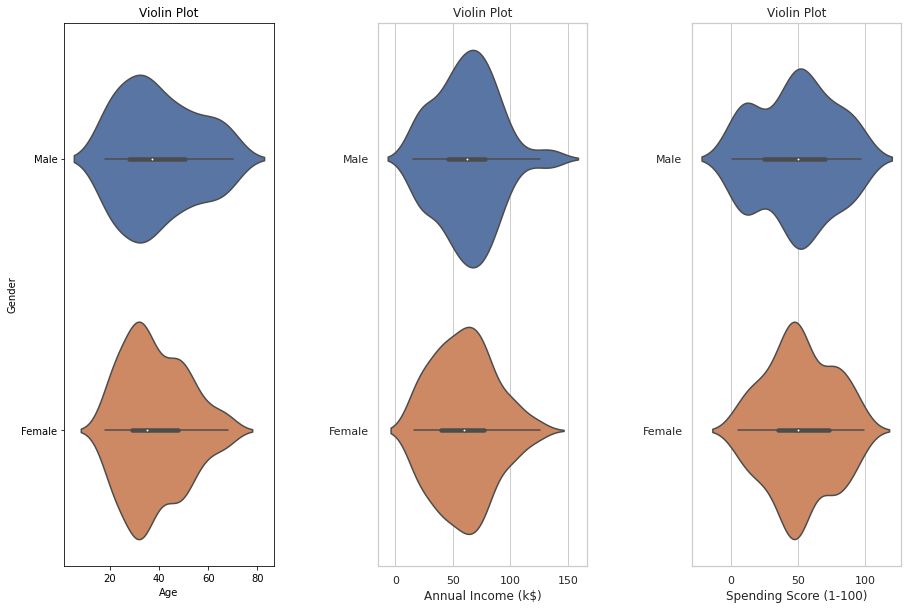

In [ ]:
plt.figure(1,figsize=(15,10))
n=0
for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n=n+1 
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(y='Gender',x=y,data=data)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show

We use the violin chart to identify density of customer groups based on genders this time and compare them side by side.

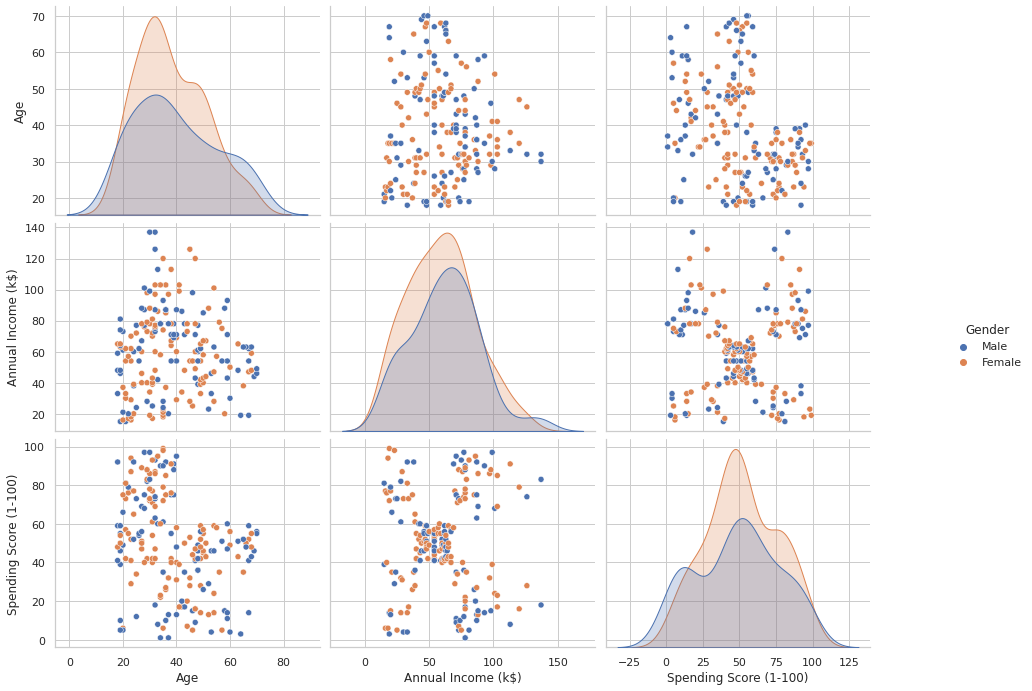

In [ ]:
sns.pairplot(data,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Gender')
fig=plt.gcf()
fig.set_size_inches(15,10)

We use the same scatterplot, only this time we highlight the gender based clusters.

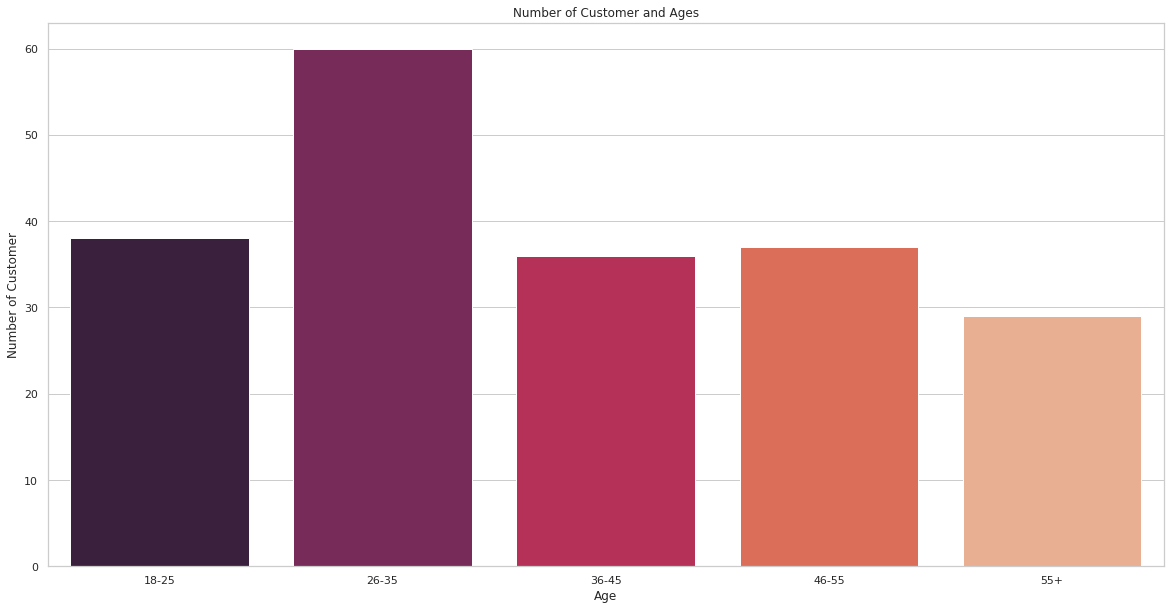

In [ ]:
age_grp1 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age_grp2 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age_grp3 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age_grp4 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age_grp5 = data.Age[data.Age >= 56]

Agex = ["18-25","26-35","36-45","46-55","55+"]
Agey = [len(age_grp1.values),len(age_grp2.values),len(age_grp3.values),len(age_grp4.values),len(age_grp5.values)]

plt.figure(figsize=(20,10))
sns.barplot(x=Agex, y=Agey, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

We use definite histograms to highlight the group density based on ages. The age group of 26-35 has the highest number of customers followed closely by below 26 and above 36. **This ,however, does not mean that these are our target customers. We need customers with high spending scores.**

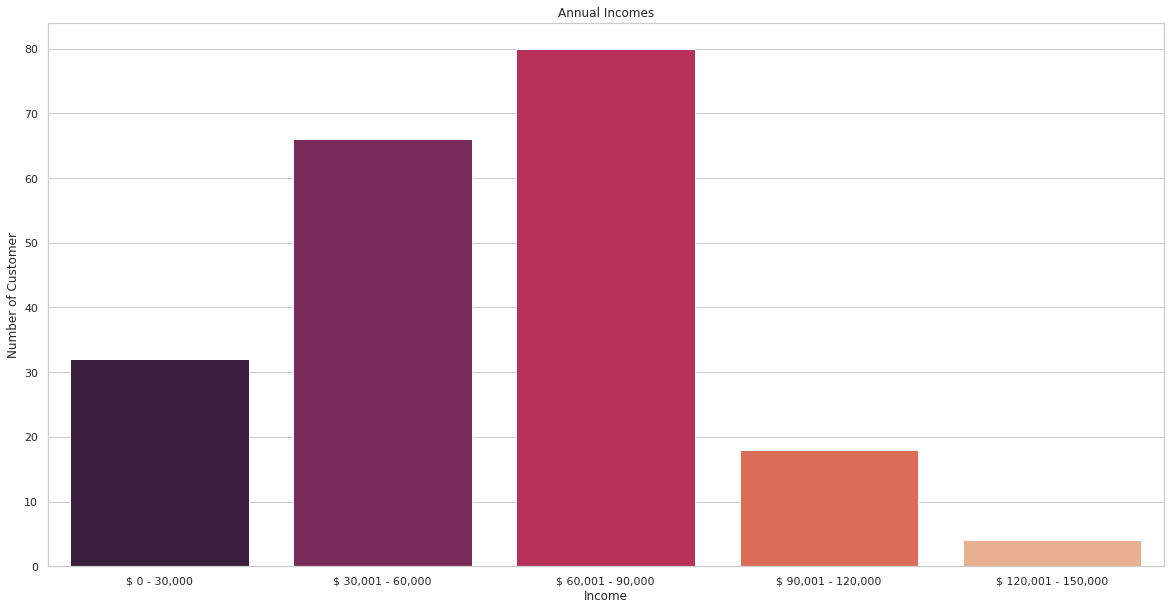

In [ ]:

AI_grp1 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
AI_grp2 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
AI_grp3 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
AI_grp4 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
AI_grp5 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

AIx = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
AIy = [len(AI_grp1.values), len(AI_grp2.values), len(AI_grp3.values), len(AI_grp4.values), len(AI_grp5.values)]

plt.figure(figsize=(20,10))
sns.barplot(x=AIx, y=AIy, palette="rocket")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

We use definite histograms to highlight the group desnity based on income. We see that maximum customers are with annual income of $60-90k followed by $30-60k.

In [ ]:
data['Gender']= pd.get_dummies(data['Gender'])
num_cols= ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
norm= normalize(data[num_cols])
data_scaled= pd.DataFrame(norm, columns= num_cols)
data_scaled['Gender']= data['Gender']
data_scaled.head(10)

,Annual Income (k$),Spending Score (1-100),Age,Gender
0,0.326783,0.849635,0.413925,0
1,0.176446,0.952809,0.247025,0
2,0.608229,0.228086,0.760286,1
3,0.195267,0.939723,0.280697,1
4,0.318439,0.749269,0.580683,1
5,0.210069,0.939131,0.271854,1
6,0.452124,0.150708,0.879131,1
7,0.182866,0.954967,0.233662,1
8,0.284311,0.044891,0.957680,0
9,0.236669,0.896853,0.373689,1


We process the data further for simplicity in performing kmeans scatttering.

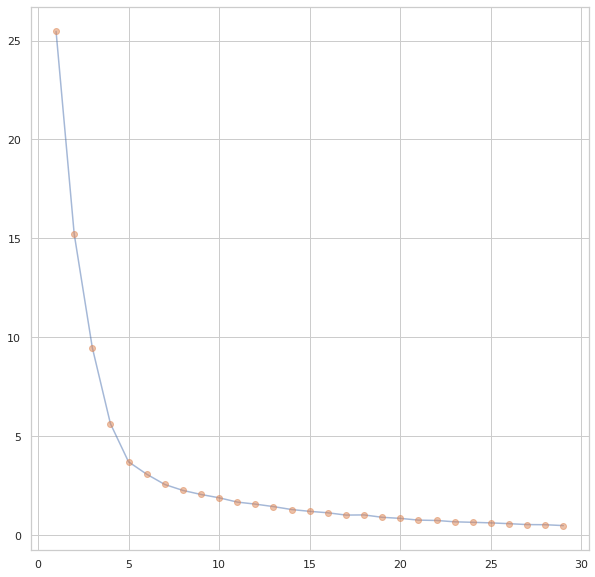

In [ ]:
distortions= []
for i in range(1,30):
    kmeans= KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state= 100, algorithm= 'full')
    kmeans.fit(data_scaled[num_cols])
    distortions.append(kmeans.inertia_)
    
plt.plot(np.arange(1,30,1), distortions,  alpha= 0.5)       
plt.plot(np.arange(1,30,1), distortions,'o',  alpha= 0.5)    
plt.show()

We see here that after the point 5, the curve becomes smooth. Hence, we take our number of clusters to be 5.

In [ ]:
kmeans= KMeans(n_clusters=5,  init='k-means++', n_init=30, max_iter=300, tol=0.0001,random_state= 100, algorithm= 'full')
kmeans.fit(data_scaled[num_cols])
data_scaled['cluster_labels']= kmeans.labels_

In [ ]:
data_scaled

,Annual Income (k$),Spending Score (1-100),Age,Gender,cluster_labels
0,0.326783,0.849635,0.413925,0,2
1,0.176446,0.952809,0.247025,0,2
2,0.608229,0.228086,0.760286,1,0
3,0.195267,0.939723,0.280697,1,2
4,0.318439,0.749269,0.580683,1,2
...,...,...,...,...,...
195,0.811515,0.534247,0.236692,1,4
196,0.921773,0.204838,0.329205,1,3
197,0.842324,0.494698,0.213924,0,4
198,0.965915,0.126909,0.225615,0,3


In [ ]:
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
5,1,22,17,76
6,1,35,18,6
7,1,23,18,94
8,0,64,19,3
9,1,30,19,72


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.56,0.497633,0.0,0.00,1.0,1.0,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

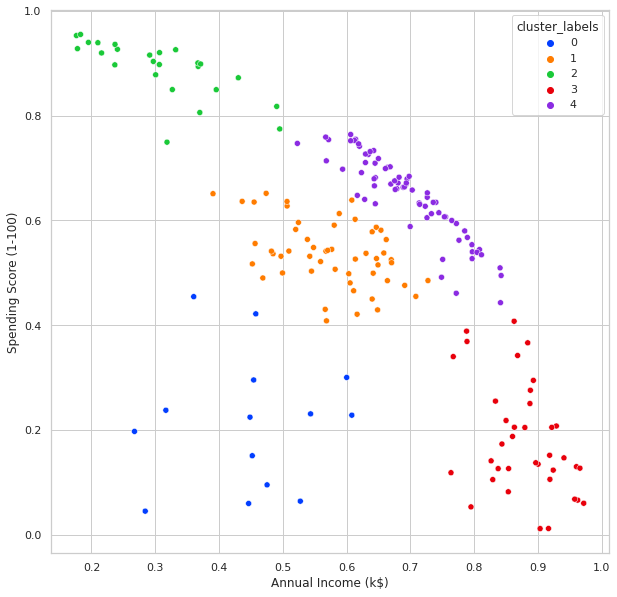

In [ ]:
sns.scatterplot(x= 'Annual Income (k$)', y= 'Spending Score (1-100)', hue='cluster_labels', data= data_scaled, palette= 'bright')

 **Green**- Priority Customers (Income:10-25 k$) 
 **Purple**- Target Customers (High Income[60-80 k$] + High spending score)
 **Orange/Red**- Moderately Targeted Customers (High Income/High spending score)
 **Blue**-  Usual Customers

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

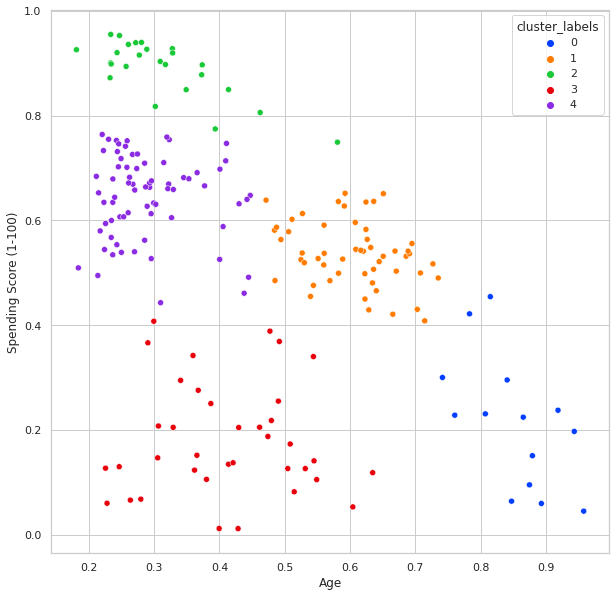

In [ ]:
sns.scatterplot(x= 'Age', y= 'Spending Score (1-100)', hue='cluster_labels', data= data_scaled, palette= 'bright')

 **Green**- Priority Customers
 **Purple**- Target Customers 
 **Orange**- Moderately Targeted Customers
 **Blue/Red**-  Usual Customers